In [ ]:
python金融风控评分卡模型和数据分析微专业课：http://dwz.date/b9vv
微信公众号：pythonEducation，QQ：231469242 ，GitHub：toby0077
网易云课堂教学主页：http://dwz.date/bwes
讲师Toby，持牌照消费金融模型专家，和中科院，中科大教授保持长期项目合作；和同盾，聚信立等外部数据源公司有项目对接。
熟悉消费金融场景业务，线上线下业务，包括现金贷，商品贷，医美，反欺诈，汽车金融等等。模型项目200+，擅长Python机器学习建模，对于变量筛选，
衍生变量构造，变量缺失率高，正负样本不平衡，共线性高，多算法比较，调参等疑难问题有良好解决方法。   

In [1]:
#第一课.描述性统计
#包括数据数量，维度，缺失率，平均数，中位数等等
#描述性统计类似前期侦查，必不可少

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#解决中文不能显示问题，matplotlib没有中文字体
# 设置字体样式
#Sans-serif是专指西文中没有衬线的字体
#simhei字体是一款国标黑体的字体,适用于文章书写、广告制作、艺术设计等方面
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [4]:
#读取数据
data=pd.read_excel('data.xlsx')

In [43]:
data

,installment,total_rec_prncp,last_pymnt_amnt,total_pymnt_inv,int_rate,total_pymnt,total_rec_int,mo_sin_old_rev_tl_op,dti,annual_inc,...,emp_length,term,issue_d,loan_amnt,grade,verification_status,home_ownership,purpose,emp_title,target
0,324.23,478.34,324.23,639.85,0.1033,639.850000,161.51,275,6.15,280000.0,...,0,36 months,2018-12-01,10000,B,Not Verified,MORTGAGE,debt_consolidation,NaN,0
1,84.92,113.98,84.92,167.02,0.1356,167.020000,53.04,212,18.24,55000.0,...,10,36 months,2018-12-01,2500,C,Not Verified,RENT,debt_consolidation,Chef,0
2,276.49,283.37,276.49,539.42,0.1356,539.420000,256.05,149,19.23,40000.0,...,0,60 months,2018-12-01,12000,C,Not Verified,MORTGAGE,debt_consolidation,NaN,0
3,352.69,345.43,352.69,686.14,0.1447,687.290000,341.86,230,41.60,30000.0,...,11,60 months,2018-12-01,15000,C,Source Verified,MORTGAGE,debt_consolidation,NaN,0
4,406.04,335.37,406.04,788.12,0.1797,788.120000,452.75,158,21.91,51000.0,...,5,60 months,2018-12-01,16000,D,Not Verified,MORTGAGE,debt_consolidation,Instructional Coordinator,0
5,373.62,376.48,373.62,728.52,0.2340,728.520000,352.04,92,23.01,65000.0,...,9,36 months,2018-12-01,9600,E,Not Verified,RENT,credit_card,driver coordinator,0
6,155.68,156.87,155.68,303.56,0.2340,303.560000,146.69,118,26.33,90000.0,...,3,36 months,2018-12-01,4000,E,Source Verified,RENT,debt_consolidation,Security,0
7,131.67,142.71,131.67,257.25,0.2089,257.250000,114.54,170,9.09,40000.0,...,10,36 months,2018-12-01,3500,D,Source Verified,MORTGAGE,car,gas attendant,0
8,323.37,441.44,323.37,670.98,0.1298,670.980000,229.54,100,0.84,35704.0,...,11,36 months,2018-12-01,9600,B,Not Verified,MORTGAGE,home_improvement,NaN,0
9,311.35,313.73,311.35,607.10,0.2340,607.100000,293.37,287,33.24,43000.0,...,10,36 months,2018-12-01,8000,E,Source Verified,OWN,debt_consolidation,Manager,0


In [6]:
numbers=data.shape[0]

In [7]:
numbers

128412

In [8]:
#数据维度，数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Data columns (total 24 columns):
installment             128412 non-null float64
total_rec_prncp         128412 non-null float64
last_pymnt_amnt         128412 non-null float64
total_pymnt_inv         128412 non-null float64
int_rate                128412 non-null float64
total_pymnt             128412 non-null float64
total_rec_int           128412 non-null float64
mo_sin_old_rev_tl_op    128412 non-null int64
dti                     128175 non-null float64
annual_inc              128412 non-null float64
avg_cur_bal             128399 non-null float64
all_util                128375 non-null float64
mo_sin_old_il_acct      123934 non-null float64
mths_since_rcnt_il      123934 non-null float64
emp_length              128412 non-null int64
term                    128412 non-null object
issue_d                 128412 non-null datetime64[ns]
loan_amnt               128412 non-null int64
grade                   1

In [9]:
data.describe()

,installment,total_rec_prncp,last_pymnt_amnt,total_pymnt_inv,int_rate,total_pymnt,total_rec_int,mo_sin_old_rev_tl_op,dti,annual_inc,avg_cur_bal,all_util,mo_sin_old_il_acct,mths_since_rcnt_il,emp_length,loan_amnt,target
count,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128175.000000,1.284120e+05,128399.000000,128375.000000,123934.000000,123934.000000,128412.000000,128412.000000,128412.000000
mean,463.261221,1757.959991,954.398560,2385.075231,0.129305,2385.605986,627.484852,173.063623,19.933178,8.279733e+04,13828.378874,54.298812,123.056925,20.201519,5.976225,15971.321021,0.014235
std,285.718371,3411.613404,3140.578731,3499.960483,0.050902,3500.080151,520.636630,100.200199,20.143542,1.082985e+05,17487.605341,20.655736,56.581697,24.869930,4.010278,10150.384233,0.118461
min,30.480000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,253.630000,604.280000,260.860000,971.900000,0.084600,972.250000,248.350000,98.000000,11.760000,4.705800e+04,2927.000000,40.000000,84.000000,6.000000,2.000000,8000.000000,0.000000
50%,382.905000,994.120000,401.530000,1584.235000,0.118000,1584.710000,477.040000,155.000000,17.990000,6.800000e+04,7048.000000,55.000000,130.000000,13.000000,6.000000,14000.000000,0.000000
75%,622.680000,1671.870000,661.950000,2617.910000,0.161400,2618.072943,855.575000,224.000000,25.300000,9.900000e+04,19122.500000,69.000000,156.000000,24.000000,10.000000,21600.000000,0.000000
max,1618.240000,40000.000000,41253.540000,43313.650000,0.309900,43313.650218,4981.050000,826.000000,999.000000,9.757200e+06,623229.000000,188.000000,827.000000,505.000000,11.000000,40000.000000,1.000000


In [10]:
#各个变量缺失率统计
missing_pct=data.apply(lambda x : (len(x)-x.count())/len(x))

In [11]:
missing_pct

installment             0.000000
total_rec_prncp         0.000000
last_pymnt_amnt         0.000000
total_pymnt_inv         0.000000
int_rate                0.000000
total_pymnt             0.000000
total_rec_int           0.000000
mo_sin_old_rev_tl_op    0.000000
dti                     0.001846
annual_inc              0.000000
avg_cur_bal             0.000101
all_util                0.000288
mo_sin_old_il_acct      0.034872
mths_since_rcnt_il      0.034872
emp_length              0.000000
term                    0.000000
issue_d                 0.000000
loan_amnt               0.000000
grade                   0.000000
verification_status     0.000000
home_ownership          0.000000
purpose                 0.000000
emp_title               0.163123
target                  0.000000
dtype: float64

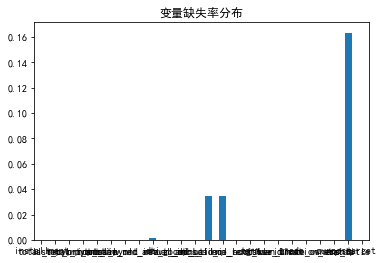

In [13]:
missing_pct.plot(kind='bar',fontsize=10,rot=0,title='变量缺失率分布')

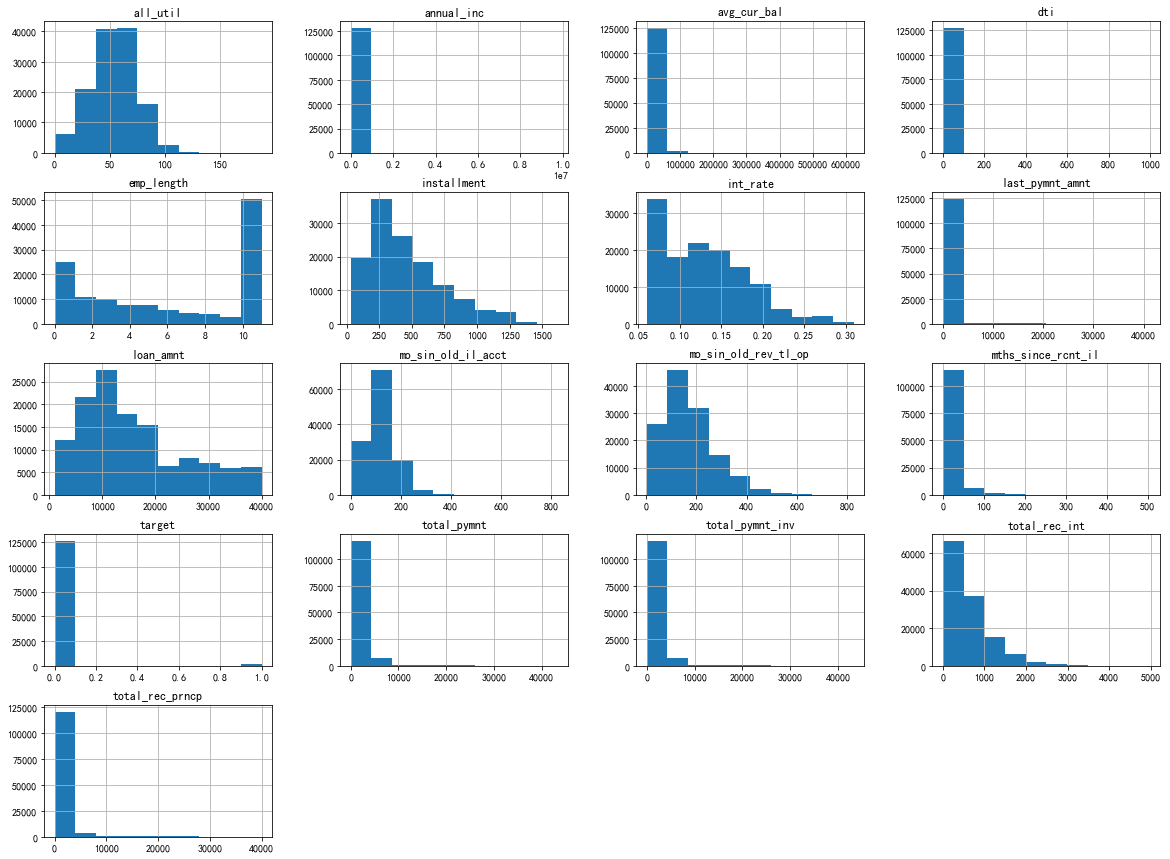

In [14]:
#直方图
data.hist(figsize=(20,15))
plt.show()

In [ ]:
#第2课.好坏客户占比
#建模前观察是否存在好坏客户占比严重失衡问题
#由于前期策略拒绝大量申请用户，建模时得到数据并非完整数据，特别是坏客户占比小于5%，训练模型时会发送偏差

In [15]:
n_bad=data[data.target==1].shape[0]

In [16]:
n_bad

1828

In [17]:
n_good=data[data.target==0].shape[0]

In [18]:
n_good

126584

In [21]:
percentage_bad=round((n_bad/numbers)*100,2)

In [22]:
percentage_bad

1.42

In [23]:
value_count=data['target'].value_counts()

In [24]:
value_count

0    126584
1      1828
Name: target, dtype: int64

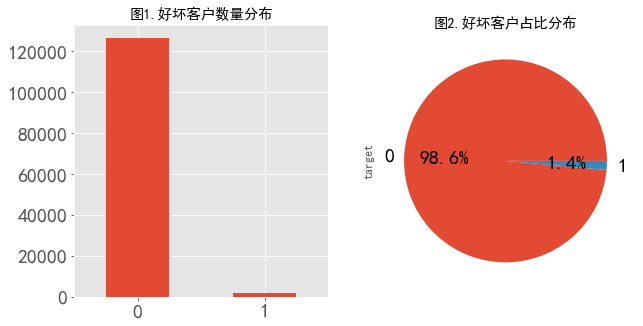

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
value_count.plot(kind='bar',fontsize=20,rot=0,title='图1.好坏客户数量分布')
ax=plt.subplot(1,2,2)
value_count.plot(kind = "pie", autopct = "%0.1f%%", title= "图2.好坏客户占比分布", fontsize=20)

In [ ]:
#课时3.变量相关性概念
#见PPT

In [4]:
#相关性！=因果性

In [5]:
matrix_cor=data.corr()

In [6]:
matrix_cor

,installment,total_rec_prncp,last_pymnt_amnt,total_pymnt_inv,int_rate,total_pymnt,total_rec_int,mo_sin_old_rev_tl_op,dti,annual_inc,avg_cur_bal,all_util,mo_sin_old_il_acct,mths_since_rcnt_il,emp_length,loan_amnt,target
installment,1.000000,0.304679,0.175705,0.403895,0.022544,0.403780,0.717844,0.122996,0.055320,0.198309,0.182158,0.043218,0.098550,0.000159,-0.022186,0.939870,0.018612
total_rec_prncp,0.304679,1.000000,0.913588,0.988953,-0.037120,0.988971,0.095764,0.042445,-0.007886,0.077957,0.086320,-0.037862,0.029320,-0.017287,-0.000123,0.280246,-0.033144
last_pymnt_amnt,0.175705,0.913588,1.000000,0.895669,0.035945,0.895695,0.034935,0.024347,-0.004754,0.047606,0.061630,-0.018162,0.019049,-0.023113,0.011847,0.168497,-0.015789
total_pymnt_inv,0.403895,0.988953,0.895669,1.000000,0.029186,0.999998,0.242213,0.049782,0.006618,0.092850,0.100374,-0.015237,0.039180,-0.021534,0.000771,0.383140,-0.035906
int_rate,0.022544,-0.037120,0.035945,0.029186,1.000000,0.029143,0.438954,-0.100968,0.098583,-0.049008,-0.064850,0.284678,-0.038811,-0.070092,0.013860,-0.029213,0.084433
total_pymnt,0.403780,0.988971,0.895695,0.999998,0.029143,1.000000,0.242113,0.049766,0.006602,0.092825,0.100356,-0.015261,0.039169,-0.021542,0.000765,0.383018,-0.035920
total_rec_int,0.717844,0.095764,0.034935,0.242213,0.438954,0.242113,1.000000,0.056405,0.096059,0.113134,0.108911,0.145473,0.071288,-0.031541,0.006003,0.738399,-0.025348
mo_sin_old_rev_tl_op,0.122996,0.042445,0.024347,0.049782,-0.100968,0.049766,0.056405,1.000000,0.053087,0.101117,0.129735,-0.056149,0.220770,0.027424,0.211861,0.145485,-0.006947
dti,0.055320,-0.007886,-0.004754,0.006618,0.098583,0.006602,0.096059,0.053087,1.000000,-0.095309,-0.019961,0.116979,0.044744,-0.120807,0.046282,0.049212,-0.003281
annual_inc,0.198309,0.077957,0.047606,0.092850,-0.049008,0.092825,0.113134,0.101117,-0.095309,1.000000,0.216337,0.029932,0.091271,-0.063972,-0.008244,0.201032,0.001930


In [7]:
matrix_cor=data.corr().round(2)

In [8]:
matrix_cor

,installment,total_rec_prncp,last_pymnt_amnt,total_pymnt_inv,int_rate,total_pymnt,total_rec_int,mo_sin_old_rev_tl_op,dti,annual_inc,avg_cur_bal,all_util,mo_sin_old_il_acct,mths_since_rcnt_il,emp_length,loan_amnt,target
installment,1.00,0.30,0.18,0.40,0.02,0.40,0.72,0.12,0.06,0.20,0.18,0.04,0.10,0.00,-0.02,0.94,0.02
total_rec_prncp,0.30,1.00,0.91,0.99,-0.04,0.99,0.10,0.04,-0.01,0.08,0.09,-0.04,0.03,-0.02,-0.00,0.28,-0.03
last_pymnt_amnt,0.18,0.91,1.00,0.90,0.04,0.90,0.03,0.02,-0.00,0.05,0.06,-0.02,0.02,-0.02,0.01,0.17,-0.02
total_pymnt_inv,0.40,0.99,0.90,1.00,0.03,1.00,0.24,0.05,0.01,0.09,0.10,-0.02,0.04,-0.02,0.00,0.38,-0.04
int_rate,0.02,-0.04,0.04,0.03,1.00,0.03,0.44,-0.10,0.10,-0.05,-0.06,0.28,-0.04,-0.07,0.01,-0.03,0.08
total_pymnt,0.40,0.99,0.90,1.00,0.03,1.00,0.24,0.05,0.01,0.09,0.10,-0.02,0.04,-0.02,0.00,0.38,-0.04
total_rec_int,0.72,0.10,0.03,0.24,0.44,0.24,1.00,0.06,0.10,0.11,0.11,0.15,0.07,-0.03,0.01,0.74,-0.03
mo_sin_old_rev_tl_op,0.12,0.04,0.02,0.05,-0.10,0.05,0.06,1.00,0.05,0.10,0.13,-0.06,0.22,0.03,0.21,0.15,-0.01
dti,0.06,-0.01,-0.00,0.01,0.10,0.01,0.10,0.05,1.00,-0.10,-0.02,0.12,0.04,-0.12,0.05,0.05,-0.00
annual_inc,0.20,0.08,0.05,0.09,-0.05,0.09,0.11,0.10,-0.10,1.00,0.22,0.03,0.09,-0.06,-0.01,0.20,0.00


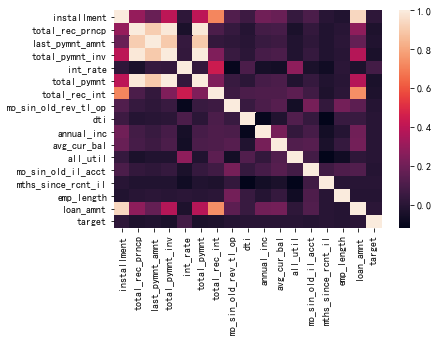

In [9]:
sns.heatmap(matrix_cor)

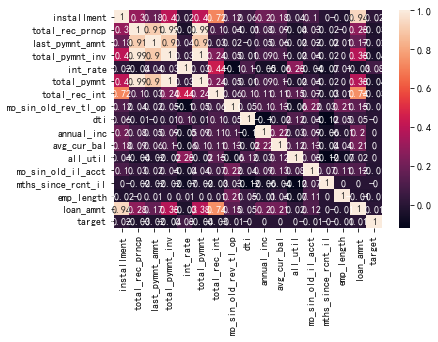

In [10]:
sns.heatmap(matrix_cor,annot=True)

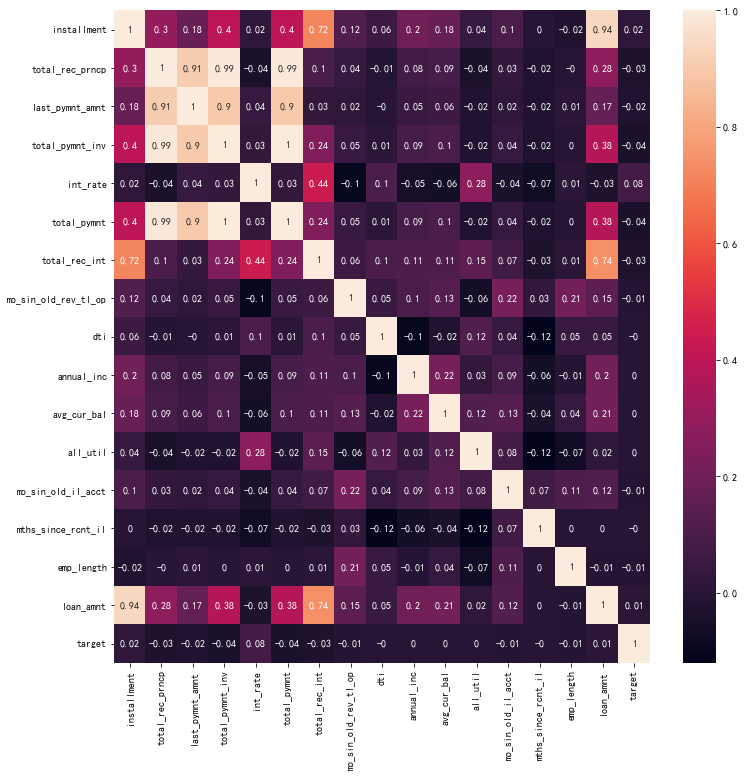

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(matrix_cor,annot=True)

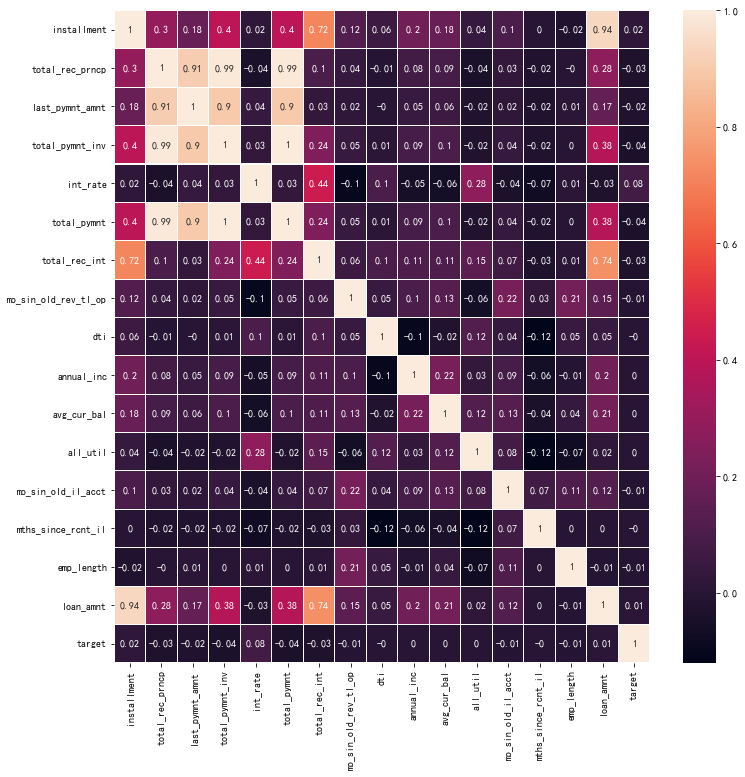

In [13]:
#绘制热图
plt.figure(figsize=(12, 12))
sns.heatmap(matrix_cor,annot=True,linewidths=0.1)

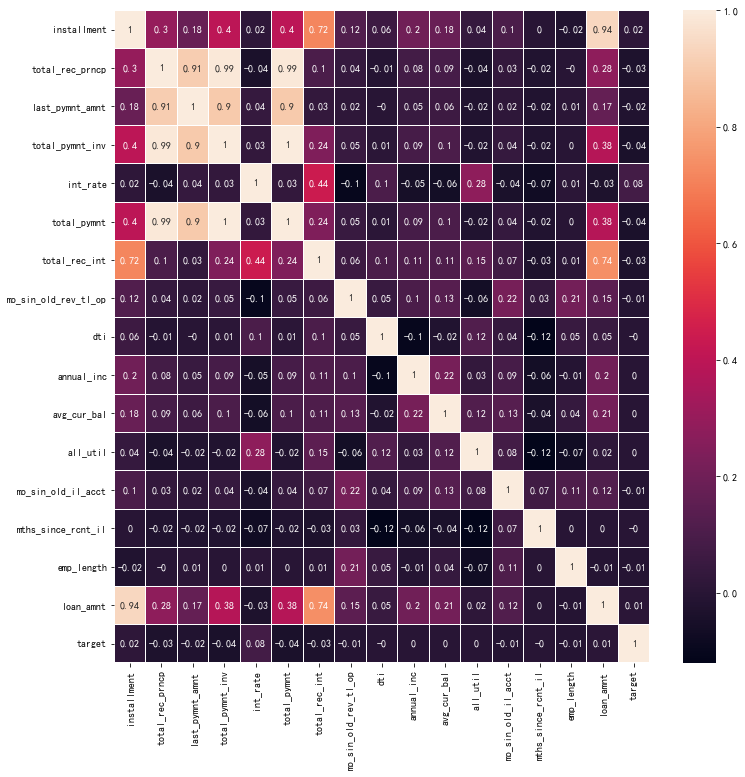

In [16]:
#绘制热图
#annot注解的缩写，annot默认为False，当annot为True时，在heatmap中每个方格写入数据
#annot_kws，当annot为True时，可设置各个参数，包括大小，颜色，加粗，斜体字等
#linewidths热力图矩阵之间的间隔大小
plt.figure(figsize=(12, 12))
sns.heatmap(matrix_cor,annot=True,linewidths = 0.05,annot_kws={'size':10,'weight':'bold'})

In [17]:
def Relation(df1,method,fileName):
    cor=df1.corr(method)
    cor.to_excel("correlation_table.xlsx")
    cor.loc[:,:]=np.tril(cor,k=-1)
    cor=cor.stack()
    #仅仅列出高相关系数，数据呈现结构化
    high_cor=cor[(cor>0.6)|(cor<-0.6)]
    df_high_cor=pd.DataFrame(high_cor)
    df_high_cor.to_excel(fileName)
    return df_high_cor

In [18]:
#皮尔斯方法
cor_pearson=Relation(data,'pearson',"high_correlation_pearson.xlsx")

In [19]:
cor_pearson

0
last_pymnt_amnt total_rec_prncp  0.913588
total_pymnt_inv total_rec_prncp  0.988953
                last_pymnt_amnt  0.895669
total_pymnt     total_rec_prncp  0.988971
                last_pymnt_amnt  0.895695
                total_pymnt_inv  0.999998
total_rec_int   installment      0.717844
loan_amnt       installment      0.939870
                total_rec_int    0.738399

In [20]:
#斯皮尔曼方法
cor_spearman=Relation(data,'spearman',"high_correlation_spearman.xlsx")

In [21]:
cor_spearman

0
total_rec_prncp installment      0.752939
last_pymnt_amnt installment      0.900334
                total_rec_prncp  0.837062
total_pymnt_inv installment      0.841205
                total_rec_prncp  0.935829
                last_pymnt_amnt  0.909725
total_pymnt     installment      0.840997
                total_rec_prncp  0.935949
                last_pymnt_amnt  0.909780
                total_pymnt_inv  0.999981
total_rec_int   installment      0.811897
                last_pymnt_amnt  0.703370
                total_pymnt_inv  0.728079
                total_pymnt      0.727866
loan_amnt       installment      0.962017
                total_rec_prncp  0.696909
                last_pymnt_amnt  0.863331
                total_pymnt_inv  0.807828
                total_pymnt      0.807598
                total_rec_int    0.826812

In [ ]:
#第5课.贷款金额
#installment单笔分期金额
#loan_amnt贷款总额
#loan_amnt贷款总额=installment单笔分期金额*贷款期数term（估算，实际情况包含其它费用，714等高炮还有砍头费）

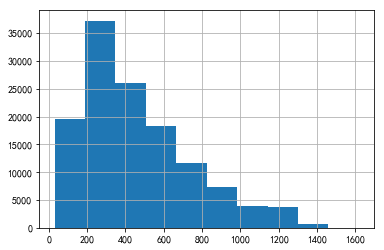

In [24]:
#分期付款金额
#直方图又称质量分布图，它是表示资料变化情况的一种主要工具。用直方图可以解析出资料的规则性，比较直观地看出产品质量特性的分布状态，
#对于资料分布状况一目了然，便于判断其总体质量分布情况。直方图表示通过沿数据范围形成分箱，然后绘制条以显示落入每个分箱的观测次数的数据分布。
data['installment'].hist()
plt.show()

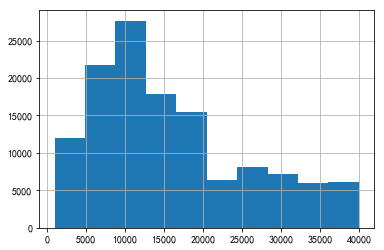

In [25]:
data['loan_amnt'].hist()
plt.show()

In [ ]:
#可以看出loan_amnt贷款金额和分期金额installment高度正相关性，cor=0.962017

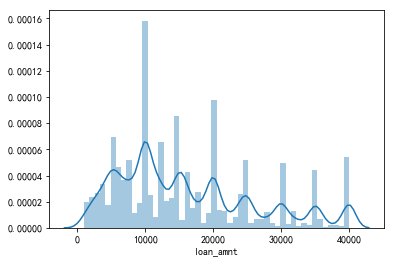

In [28]:
#Seaborn是基于matplotlib的Python可视化库。 它提供了一个高级界面来绘制有吸引力的统计图形。
#Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，不需要经过大量的调整就能使你的图变得精致。
#distplot()集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途
#直方图又称质量分布图，它是表示资料变化情况的一种主要工具。用直方图可以解析出资料的规则性，比较直观地看出产品质量特性的分布状态，
#对于资料分布状况一目了然，便于判断其总体质量分布情况。直方图表示通过沿数据范围形成分箱，然后绘制条以显示落入每个分箱的观测次数的数据分布。
from scipy.stats import norm   
sns.distplot(data.loan_amnt)

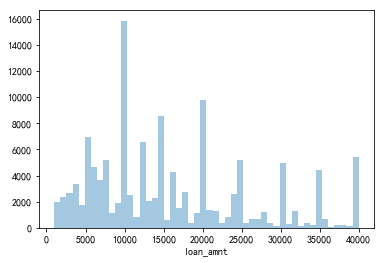

In [29]:
sns.distplot(data.loan_amnt,kde=False)

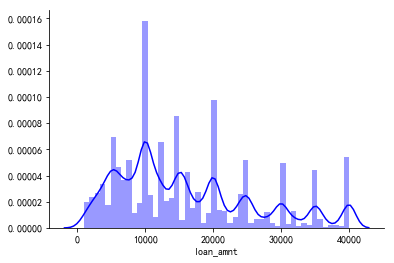

In [30]:
#核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。
sns.distplot(data.loan_amnt,kde=True,color='blue')
sns.despine(top=True)

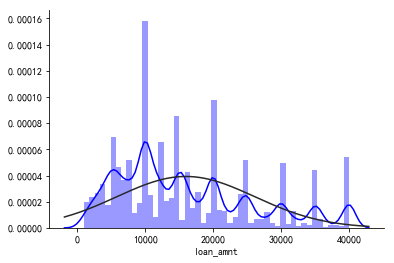

In [31]:
#增加正太分布图
#Seaborn是基于matplotlib的Python可视化库。 它提供了一个高级界面来绘制有吸引力的统计图形。
#Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，不需要经过大量的调整就能使你的图变得精致。
#displot()集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途
#fit：控制拟合的参数分布图形，能够直观地评估它与观察数据的对应关系(黑色线条为确定的分布
#sns.despine(top,right,left,bottom =True/False) 来控制四根脊柱的出
#kde是否绘制高斯核密度估计图
sns.distplot(data.loan_amnt,kde=True,color='blue',fit=norm)
sns.despine(top=True)

In [ ]:
#单笔分期金额在300美元范围内占比较多，较高金额的贷款数量较少，也间接证明了lending club 主营小额度的贷款项目。
#单笔贷款金额在1万~2万美元范围内占比较多，较高金额的贷款数量较少，也间接证明了lending club 主营小额度的贷款项目。

In [ ]:
#2018年4季度贷款笔数和贷款金额统计

In [32]:
#groupby+agg 可以对groupby的结果同时应用多个函数
perform_data = data.groupby('issue_d')['loan_amnt'].agg(['count','sum'])

In [33]:
perform_data

,count,sum
issue_d,,
2018-10-01,46305,746131475
2018-11-01,41973,666934725
2018-12-01,40134,637843075


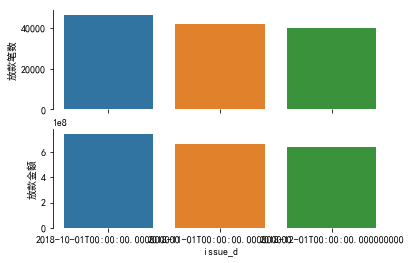

In [34]:
#绘图
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
#DatetimeIndex(['2018-10-01', '2018-11-01', '2018-12-01'], dtype='datetime64[ns]', name='issue_d', freq=None
x = perform_data.index  #月份month
y1 = perform_data['count']#贷款笔数
sns.barplot(x, y1, ax=ax1)
y2 = perform_data['sum']#贷款金额
ax1.set_xlabel("")
ax1.set_ylabel("放款笔数")
sns.barplot(x, y2,ax=ax2)
ax2.set_ylabel("放款金额")
#下边线隐藏
sns.despine(bottom=True)   

In [ ]:
#贷款笔数与放贷金额,都在减少，lendingclub在2018年4季度略有下滑趋势，业务上，年底坏账增多，放款缩紧，可以理解

In [ ]:
#第6课.贷款周期

In [ ]:
'''
贷款周期分行业看：房地产，车贷固定资产投资周期性较强。
一个周期一般是一个月
贷款周期分为36个月与60个月，主要以36个月为主，不过60个月的比重也不小。
在p2p平台上以短期贷款为主，长期贷款也有，利率较高，但周期较长。借出人收获利息，承担风险，
而借入人到期要偿还本金。贷款周期越长，对借出人来说风险越高。
在国内的环境下，借出人不仅要承担推迟还款的风险，还要担心平台跑路、本息全无的高风险；
对借入人来说，因为国内缺少健全的征信体系，借款方违约及重复违约成本低。
对国内的情况不再多说，话题绕回来。国外的部分国家已有健全的征信体系，一旦违约还款，
违约率不断上涨，个人征信也会保留记录，对后序的贷款、买房有很大的影响。所以如果贷款周期较长，
且如果没有固定的工作和固定的收入的话（即使有未定收入也不一定如期偿还），偿还本金充满变数，
很有可能违约。

'''

In [5]:
term_counts=data.term.value_counts()

In [6]:
term_counts

 36 months    88179
 60 months    40233
Name: term, dtype: int64

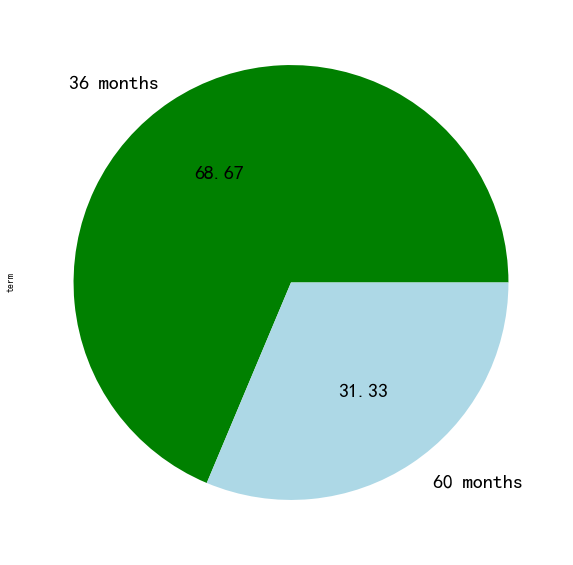

In [7]:
term_counts.plot.pie(autopct='%.2f',figsize=(10, 10),fontsize=20,colors = ['green','lightblue'])

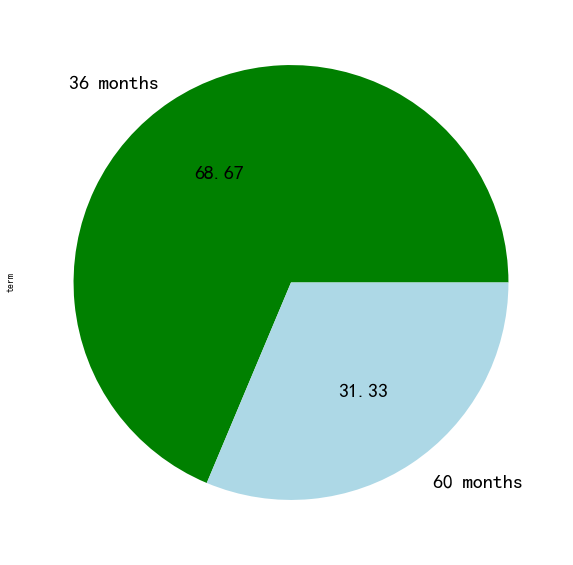

In [8]:
data.term.value_counts().plot.pie(autopct='%.2f',figsize=(10, 10),fontsize=20,colors = ['green','lightblue'])

In [ ]:
#总结：小额贷+短周期为主
#所以通过上图可以看出几个信息：
#短期贷款占比重较大，长期贷款占比也不低
#鸡蛋不放在一个篮子里，小额贷分散风险，贷款周期长，违约率高，风险大，贷款周期短，风险相对小

In [ ]:
#第8课，用户工龄分布
#不同场景平台用户工龄分布差异大
#医美主要为16-30岁群体，lendingclub针对工作时长高群体

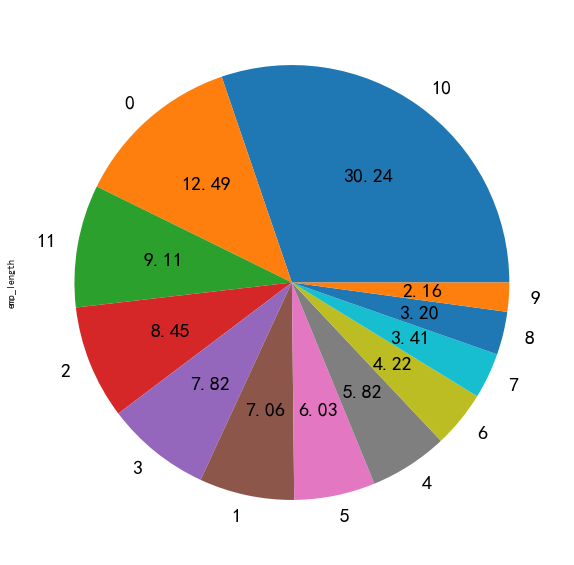

In [9]:
data.emp_length.value_counts().plot.pie(autopct='%.2f',figsize=(10,10),fontsize=20)

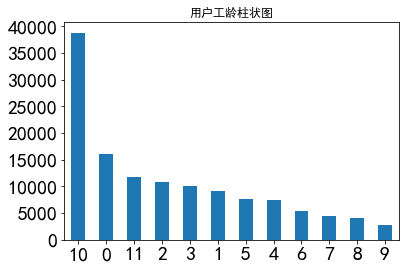

In [10]:
data.emp_length.value_counts().plot(kind='bar',fontsize=20,rot=0,title='用户工龄柱状图')

In [11]:
value_count=data["emp_length"].value_counts()

In [12]:
value_count

10    38826
0     16036
11    11704
2     10857
3     10038
1      9067
5      7737
4      7474
6      5422
7      4374
8      4104
9      2773
Name: emp_length, dtype: int64

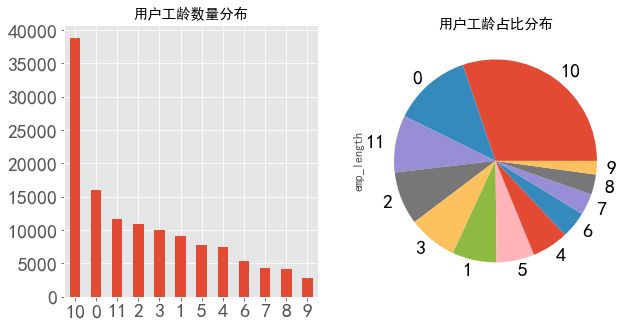

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
value_count.plot(kind='bar',fontsize=20,rot=0,title='用户工龄数量分布')
ax=plt.subplot(1,2,2)
value_count.plot(kind='pie',fontsize=20,rot=0,title='用户工龄占比分布')
plt.show()

In [ ]:
#第9课贷款人收入分布

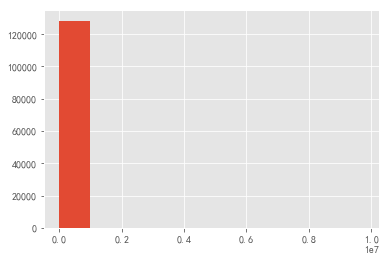

In [19]:
data.annual_inc.hist()

In [20]:
income_count=data['annual_inc'].value_counts()

In [21]:
income_count

60000.0     5035
50000.0     4271
65000.0     3771
70000.0     3735
80000.0     3643
75000.0     3573
40000.0     3395
100000.0    3074
45000.0     2940
55000.0     2887
90000.0     2628
85000.0     2550
120000.0    2526
35000.0     2147
30000.0     2028
110000.0    1787
150000.0    1737
52000.0     1545
95000.0     1530
48000.0     1395
42000.0     1376
72000.0     1351
130000.0    1291
125000.0    1260
36000.0     1028
25000.0     1024
62000.0      972
105000.0     955
140000.0     955
38000.0      944
            ... 
31696.0        1
79660.0        1
36975.0        1
45154.0        1
147850.0       1
90310.0        1
101552.0       1
147855.0       1
147856.0       1
51688.0        1
147864.0       1
73939.0        1
66200.0        1
36972.0        1
16380.0        1
36976.0        1
106748.0       1
23640.0        1
57183.0        1
45172.0        1
29520.0        1
40496.0        1
45178.0        1
52560.0        1
261000.0       1
55862.4        1
28300.0        1
65563.0       

In [22]:
#方法一
data['annual_inc']=np.where(data['annual_inc']<=50000,'0-50000',data['annual_inc'])

In [23]:
data['annual_inc']

0         280000.0
1          55000.0
2          0-50000
3          0-50000
4          51000.0
5          65000.0
6          90000.0
7          0-50000
8          0-50000
9          0-50000
10         0-50000
11         90000.0
12         80000.0
13         59280.0
14         68107.0
15        150000.0
16         90000.0
17        290000.0
18        136000.0
19         0-50000
20        140000.0
21         0-50000
22         62000.0
23        105000.0
24         0-50000
25         82000.0
26         72000.0
27         67000.0
28         77479.0
29        150000.0
            ...   
128382     60000.0
128383    120000.0
128384     0-50000
128385     0-50000
128386     90000.0
128387     55000.0
128388     97000.0
128389     0-50000
128390     85000.0
128391     0-50000
128392     74160.0
128393     82000.0
128394     70000.0
128395     72000.0
128396     60000.0
128397     75000.0
128398    128000.0
128399     0-50000
128400     80000.0
128401     0-50000
128402     0-50000
128403     0

In [25]:
#方法二
data = pd.read_excel('data.xlsx')

In [26]:
bins=[0,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,
        150000,160000,170000,180000,190000,200000,300000]
data['annual_inc']=pd.cut(data['annual_inc'],bins)

In [27]:
income_counts=data.annual_inc.value_counts()

In [28]:
income_counts

(0, 50000]          38781
(50000, 60000]      15871
(60000, 70000]      13902
(70000, 80000]      12835
(80000, 90000]       9416
(90000, 100000]      8491
(100000, 110000]     5282
(110000, 120000]     4855
(120000, 130000]     3640
(200000, 300000]     2901
(140000, 150000]     2881
(130000, 140000]     2456
(150000, 160000]     1457
(170000, 180000]     1372
(160000, 170000]     1106
(190000, 200000]     1043
(180000, 190000]      726
Name: annual_inc, dtype: int64

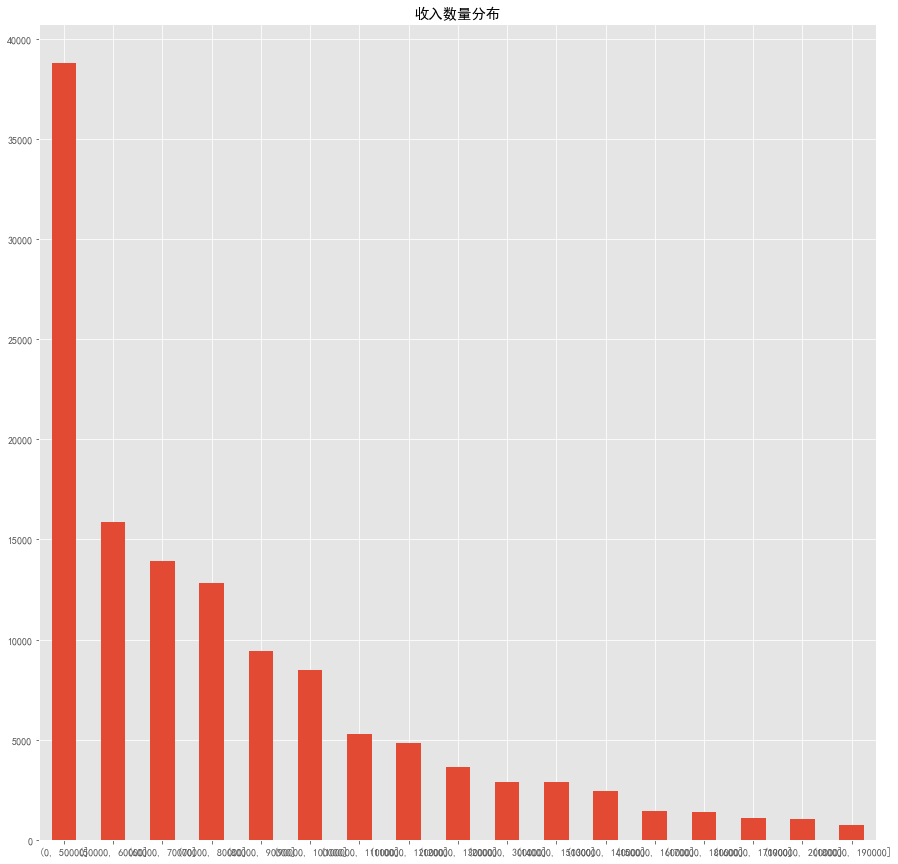

In [32]:
plt.figure(figsize=(15,15))
income_counts.plot(kind='bar',fontsize=10,rot=0,title="收入数量分布")

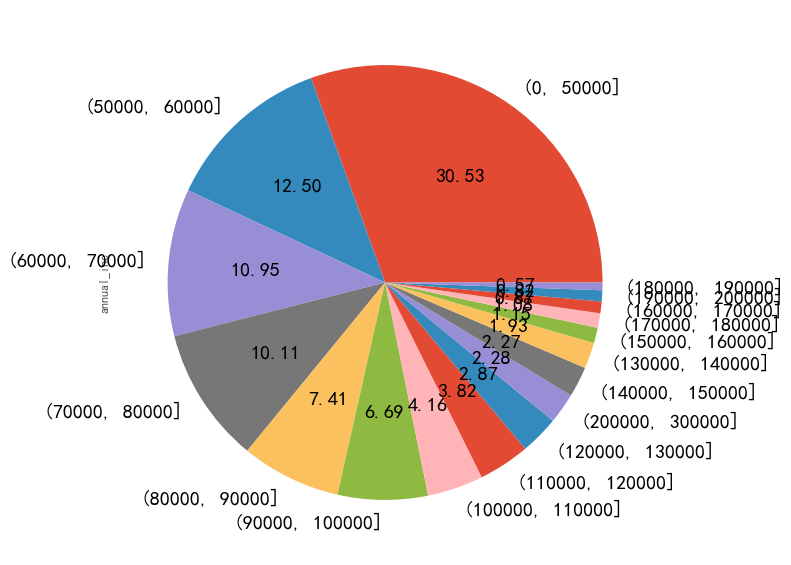

In [33]:
income_counts.plot.pie(autopct='%.2f',figsize=(10,10),fontsize=20)

In [ ]:
#第10课.贷款人收入水平和贷款等级

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


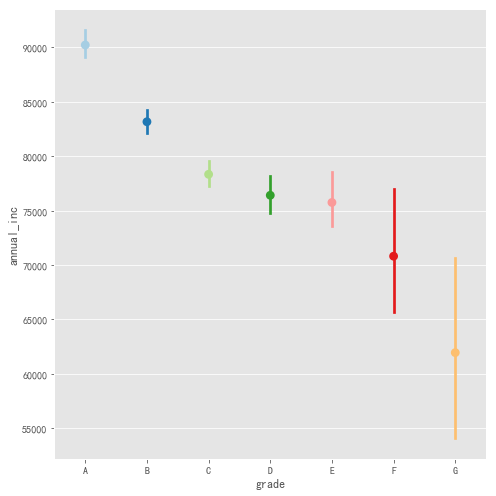

In [44]:
sns.factorplot(x="grade", y="annual_inc", 
              data=data,order=list('ABCDEFG'),size=7,palette="Paired")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


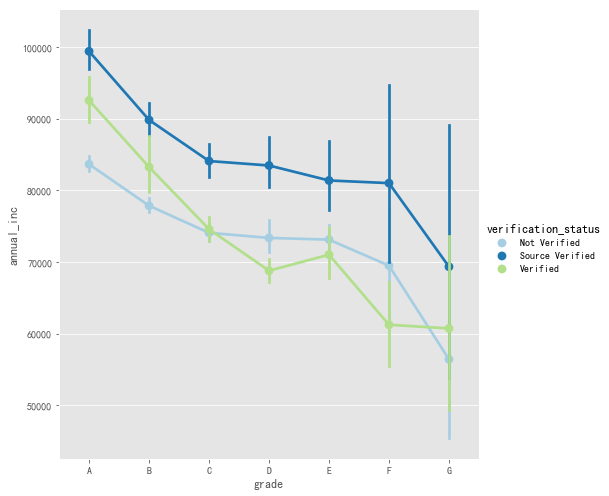

In [45]:
sns.factorplot(x="grade", y="annual_inc", 
              data=data,order=list('ABCDEFG'),size=7,palette="Paired",hue="verification_status")

In [ ]:
#第11课.借款人住房
##美国有房产税，对抑制炒房有很好作用，中国房产税雨声小，雷声大，炒房非常严重

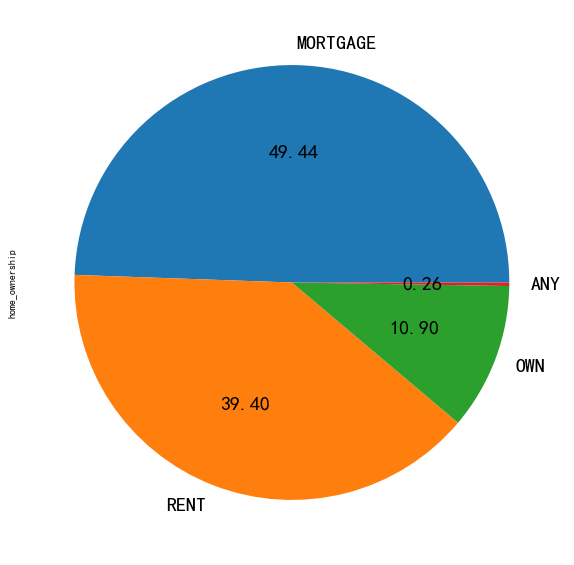

In [6]:
data.home_ownership.value_counts().plot.pie(autopct='%.2f', figsize=(10, 10),fontsize=20)

In [ ]:
#贷款等级与住房情况

In [7]:
analysis_data_home=data.groupby(['grade','home_ownership']).count()

In [8]:
analysis_data_home

installment  total_rec_prncp  last_pymnt_amnt  \
grade home_ownership                                                  
A     ANY                     106              106              106   
      MORTGAGE              20336            20336            20336   
      OWN                    3838             3838             3838   
      RENT                  13731            13731            13731   
B     ANY                     110              110              110   
      MORTGAGE              18257            18257            18257   
      OWN                    3921             3921             3921   
      RENT                  13573            13573            13573   
C     ANY                      71               71               71   
      MORTGAGE              14462            14462            14462   
      OWN                    3480             3480             3480   
      RENT                  13005            13005            13005   
D     ANY                      29               29               29   
      MORTGAGE               7759             7759             7759   
      OWN                    1970             1970             1970   
      RENT                   7314             7314             7314   
E     ANY                      15               15               15   
      MORTGAGE               2478             2478             2478   
      OWN                     734              734              734   
      RENT                   2735             2735             2735   
F     MORTGAGE                158              158              158   
      OWN                      42               42               42   
      RENT                    187              187              187   
G     ANY                       2                2                2   
      MORTGAGE                 40               40               40   
      OWN                       8                8                8   
      RENT                     51               51               51   

                      total_pymnt_inv  int_rate  total_pymnt  total_rec_int  \
grade home_ownership                                                          
A     ANY                         106       106          106            106   
      MORTGAGE                  20336     20336        20336          20336   
      OWN                        3838      3838         3838           3838   
      RENT                      13731     13731        13731          13731   
B     ANY                         110       110          110            110   
      MORTGAGE                  18257     18257        18257          18257   
      OWN                        3921      3921         3921           3921   
      RENT                      13573     13573        13573          13573   
C     ANY                          71        71           71             71   
      MORTGAGE                  14462     14462        14462          14462   
      OWN                        3480      3480         3480           3480   
      RENT                      13005     13005        13005          13005   
D     ANY                          29        29           29             29   
      MORTGAGE                   7759      7759         7759           7759   
      OWN                        1970      1970         1970           1970   
      RENT                       7314      7314         7314           7314   
E     ANY                          15        15           15             15   
      MORTGAGE                   2478      2478         2478           2478   
      OWN                         734       734          734            734   
      RENT                       2735      2735         2735           2735   
F     MORTGAGE                    158       158          158            158   
      OWN                          42        42           42             42   
      RENT                        187       187          187      

In [9]:
analysis_data_home=data.groupby(['grade','home_ownership'])['issue_d'].count()

In [10]:
analysis_data_home

grade  home_ownership
A      ANY                 106
       MORTGAGE          20336
       OWN                3838
       RENT              13731
B      ANY                 110
       MORTGAGE          18257
       OWN                3921
       RENT              13573
C      ANY                  71
       MORTGAGE          14462
       OWN                3480
       RENT              13005
D      ANY                  29
       MORTGAGE           7759
       OWN                1970
       RENT               7314
E      ANY                  15
       MORTGAGE           2478
       OWN                 734
       RENT               2735
F      MORTGAGE            158
       OWN                  42
       RENT                187
G      ANY                   2
       MORTGAGE             40
       OWN                   8
       RENT                 51
Name: issue_d, dtype: int64

In [11]:
analysis_data_home = data.groupby(['grade','home_ownership'])[['issue_d']].count().apply(lambda x:x/x.sum(level=0))

In [12]:
analysis_data_home

issue_d
grade home_ownership          
A     ANY             0.002789
      MORTGAGE        0.535003
      OWN             0.100971
      RENT            0.361238
B     ANY             0.003067
      MORTGAGE        0.509105
      OWN             0.109339
      RENT            0.378489
C     ANY             0.002289
      MORTGAGE        0.466245
      OWN             0.112193
      RENT            0.419273
D     ANY             0.001699
      MORTGAGE        0.454487
      OWN             0.115394
      RENT            0.428421
E     ANY             0.002516
      MORTGAGE        0.415632
      OWN             0.123113
      RENT            0.458739
F     MORTGAGE        0.408269
      OWN             0.108527
      RENT            0.483204
G     ANY             0.019802
      MORTGAGE        0.396040
      OWN             0.079208
      RENT            0.504950

In [ ]:
#在用pandas进行数据重排时，经常用到stack和unstack两个函数。stack的意思是堆叠，堆积，unstack即“不要堆叠”
#常见的数据的层次化结构有两种，一种是表格，一种是“花括号”，即下面这样的l两种形式：

In [13]:
analysis_data_home1=analysis_data_home.unstack(level=1)

In [14]:
analysis_data_home1

issue_d                              
home_ownership       ANY  MORTGAGE       OWN      RENT
grade                                                 
A               0.002789  0.535003  0.100971  0.361238
B               0.003067  0.509105  0.109339  0.378489
C               0.002289  0.466245  0.112193  0.419273
D               0.001699  0.454487  0.115394  0.428421
E               0.002516  0.415632  0.123113  0.458739
F                    NaN  0.408269  0.108527  0.483204
G               0.019802  0.396040  0.079208  0.504950

In [15]:
analysis_data_home1.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object', name='grade')

In [16]:
analysis_data_home2=analysis_data_home1.stack(level=0)

In [17]:
analysis_data_home2

,home_ownership,ANY,MORTGAGE,OWN,RENT
grade,,,,,
A,issue_d,0.002789,0.535003,0.100971,0.361238
B,issue_d,0.003067,0.509105,0.109339,0.378489
C,issue_d,0.002289,0.466245,0.112193,0.419273
D,issue_d,0.001699,0.454487,0.115394,0.428421
E,issue_d,0.002516,0.415632,0.123113,0.458739
F,issue_d,NaN,0.408269,0.108527,0.483204
G,issue_d,0.019802,0.396040,0.079208,0.504950


In [18]:
analysis_data_home3=analysis_data_home2.reset_index(level=1,drop=True)

In [19]:
analysis_data_home3

home_ownership,ANY,MORTGAGE,OWN,RENT
grade,,,,
A,0.002789,0.535003,0.100971,0.361238
B,0.003067,0.509105,0.109339,0.378489
C,0.002289,0.466245,0.112193,0.419273
D,0.001699,0.454487,0.115394,0.428421
E,0.002516,0.415632,0.123113,0.458739
F,NaN,0.408269,0.108527,0.483204
G,0.019802,0.396040,0.079208,0.504950


In [20]:
analysis_data_home3.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object', name='grade')

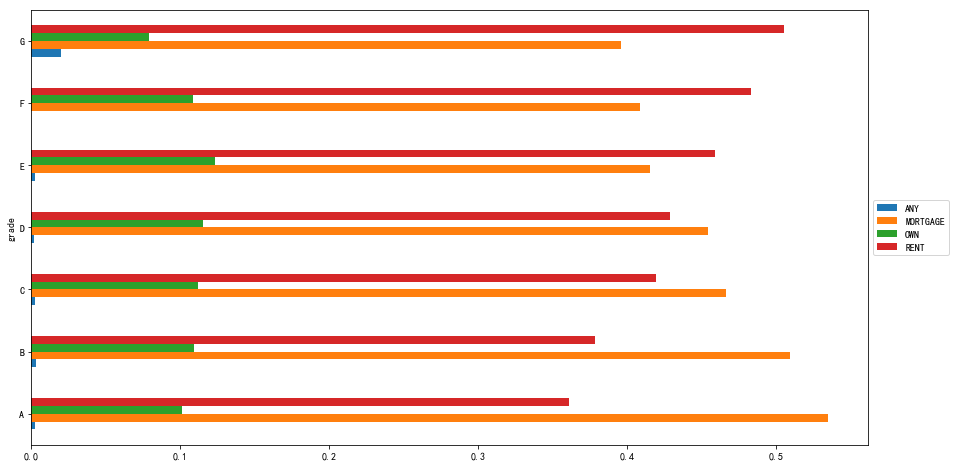

In [27]:
#bbox_to_anchor存放legend box 放置的地方
analysis_data_home3.plot.barh(figsize=(15,8)).legend(loc='center left',bbox_to_anchor=(1,0.5))

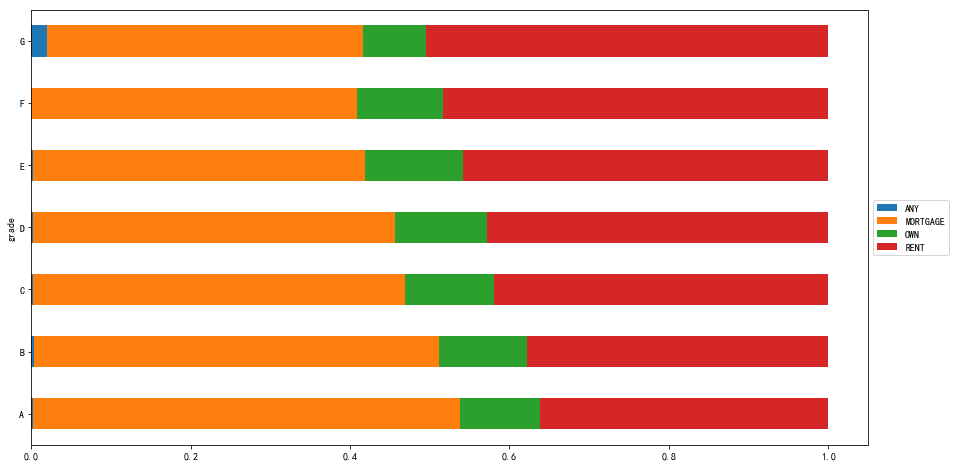

In [28]:
#bbox_to_anchor存放legend box 放置的地方
analysis_data_home3.plot.barh(stacked=True,figsize=(15,8)).legend(loc='center left',bbox_to_anchor=(1,0.5))

In [ ]:
#贷款等级与住房情况
'''
意外的发现，贷款等级越高的人群，他们的住房情况是抵押贷款的几率越高，而租房的几率越低。
而拥有完全产权的人群在各个贷款等级的人群中占比差不多。
'''

In [ ]:
#第12课.贷款用途

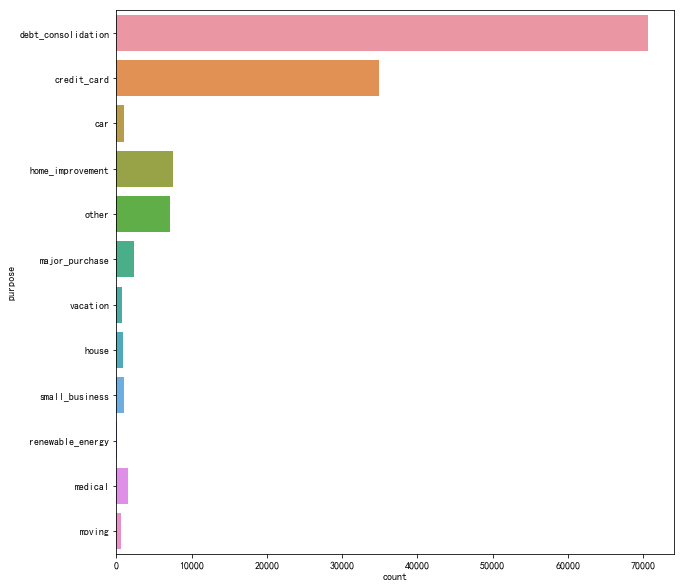

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(y=data.purpose)

In [ ]:
#贷款目的与人均收入水平
'''
综合收入水平与贷款用途得到上图，我们可以发现在第一季度中，人均收入水平较高的人群贷款用于小生意，
家庭生活改善，房子等。而贷款为了债务整合（占比最高）的人群的人均收入水平在整体的中下。
'''

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


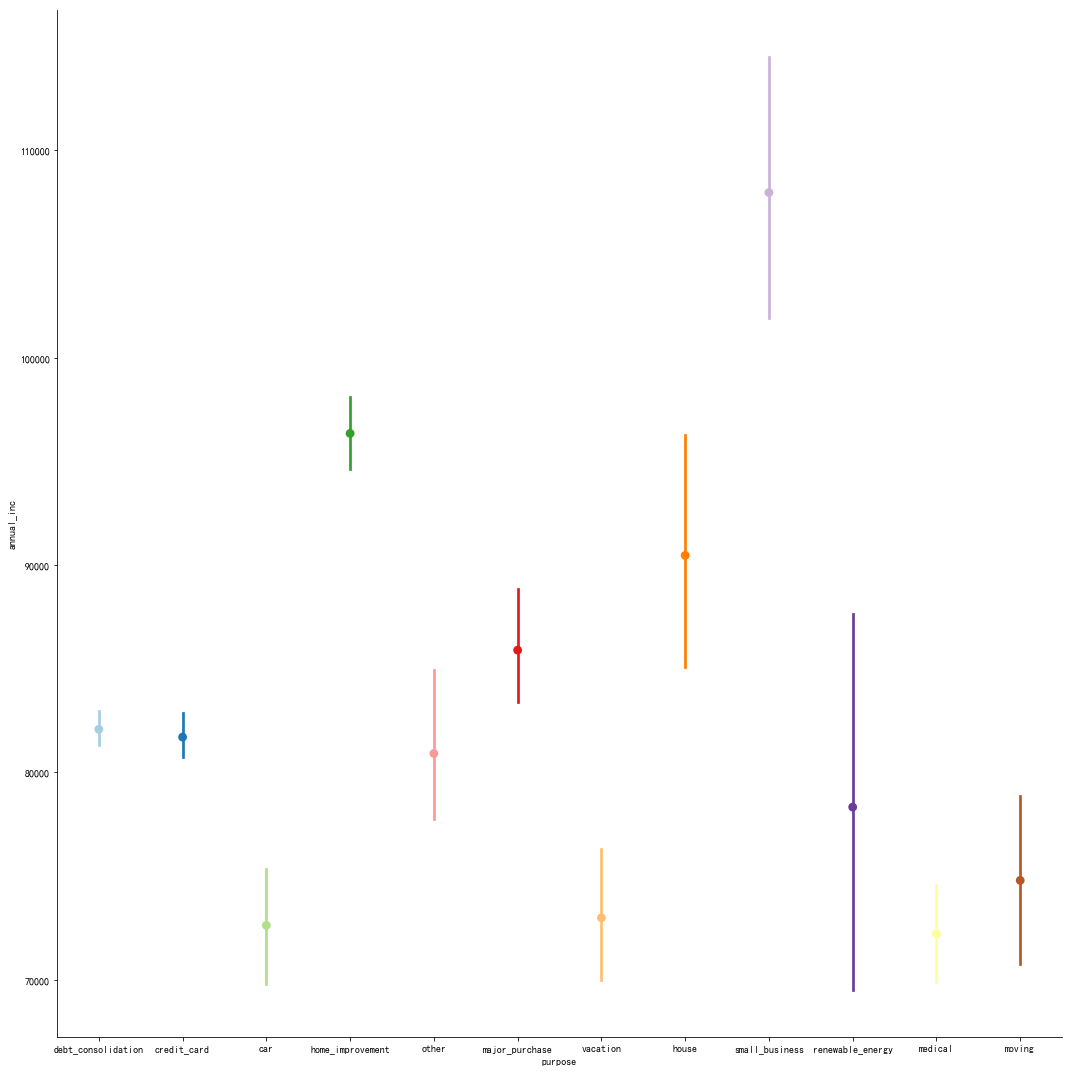

In [33]:
sns.factorplot(x="purpose", y="annual_inc", 
              data=data,size=15,palette="Paired")